#To Design an Optimized Machine Learning Model for Fault Detection in Industrial Machines.

**About the dataset:**


This simulated dataset was created in Matlab/Simulink based on the Simscape boiler model and contains total of 27,281 simulations each represented as a row with 6 distinct features.

**The class labels are:**

'Lean', 'Nominal', 'ExcessAir', 'Fouling', 'Scaling'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the dataset:**

In [ ]:
import pandas as pd
github_link = 'https://raw.githubusercontent.com/aanya-19/dataset/main/Boiler_emulator_dataset%20(1).csv'
df = pd.read_csv(github_link)
df.head()

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot,Condition,Class
0,1,283,333.0,363.574744,3.0,%=0.05,Lean
1,1,283,333.0,362.349517,3.0,%=0.1,Nominal
2,1,283,333.0,361.216941,3.0,%=0.15,ExcessAir
3,1,283,333.0,360.166890,3.0,%=0.20,ExcessAir
4,1,283,333.0,359.190662,3.0,%=0.25,ExcessAir


In [ ]:
df.shape

(27280, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27280 entries, 0 to 27279
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fuel_Mdot   27280 non-null  int64  
 1   Tair        27280 non-null  int64  
 2   Treturn     27280 non-null  float64
 3   Tsupply     27280 non-null  float64
 4   Water_Mdot  27280 non-null  float64
 5   Condition   27280 non-null  object 
 6   Class       27280 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


#EDA

###Ques 1. Suggest an appropriate strategy for dealing with the missing values in the dataset, if any. Also do label encoding in the dataset wherever needed.

In [ ]:
df.isnull().sum()

,0
Fuel_Mdot,0
Tair,0
Treturn,0
Tsupply,0
Water_Mdot,0
Condition,0
Class,0



To find missing values, isnull() command is used above along with the sum() command. This combination of command overall looks for the null values in the dataset column-wise.

Using the above command, it's been observed that there are no missing values in the dataset, therefore there is no need to deal with them or to do label encoding.

In [ ]:
df['Class'].unique()

array(['Lean', 'Nominal', 'ExcessAir', 'Fouling', 'Scaling'], dtype=object)

**Categorical** labels like 'Lean', 'Nominal', 'ExcessAir', 'Fouling', 'Scaling', are stored as text and cannot be directly used in most ML algorithms.By converting text data into numeric form using techniques like Label Encoding, we make the data interpretable for algorithms

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27280 entries, 0 to 27279
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fuel_Mdot   27280 non-null  int64  
 1   Tair        27280 non-null  int64  
 2   Treturn     27280 non-null  float64
 3   Tsupply     27280 non-null  float64
 4   Water_Mdot  27280 non-null  float64
 5   Condition   27280 non-null  object 
 6   Class       27280 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 1.5+ MB


###Ques 2. Drop Uneccessary columns

In [ ]:
df = df.drop(columns=['Condition'])
df.head()

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot,Class
0,1,283,333.0,363.574744,3.0,2
1,1,283,333.0,362.349517,3.0,3
2,1,283,333.0,361.216941,3.0,0
3,1,283,333.0,360.166890,3.0,0
4,1,283,333.0,359.190662,3.0,0


###Ques 3.Show graphically the distribution of the number of samples in the given dataset for each class label, namely: Lean, Nominal, ExcessAir, Fouling, and Scaling.

<Axes: title={'center': 'Class Distribution'}, xlabel='Class'>

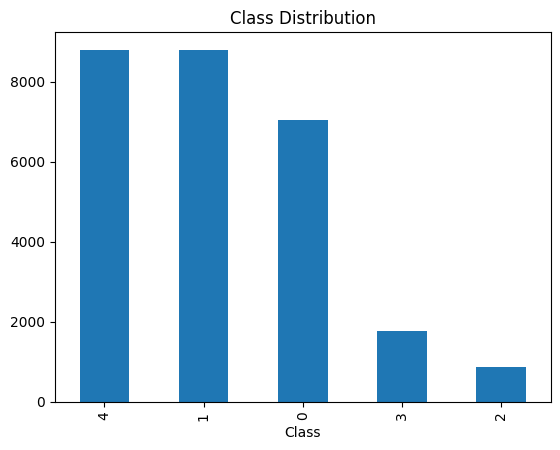

In [ ]:
df['Class'].value_counts().plot(kind='bar', title='Class Distribution')

 Class 4 and Class 1 are the most prevalent with 8,800 samples each, followed by Class 0 with 7,040 samples. Classes 3 and 2 have significantly fewer samples, with 1,760 and 880 respectively, indicating an imbalanced dataset.

In [ ]:
print(df['Class'].value_counts())

Class
4    8800
1    8800
0    7040
3    1760
2     880
Name: count, dtype: int64


###Ques.3 Find correlation among the various feature readings

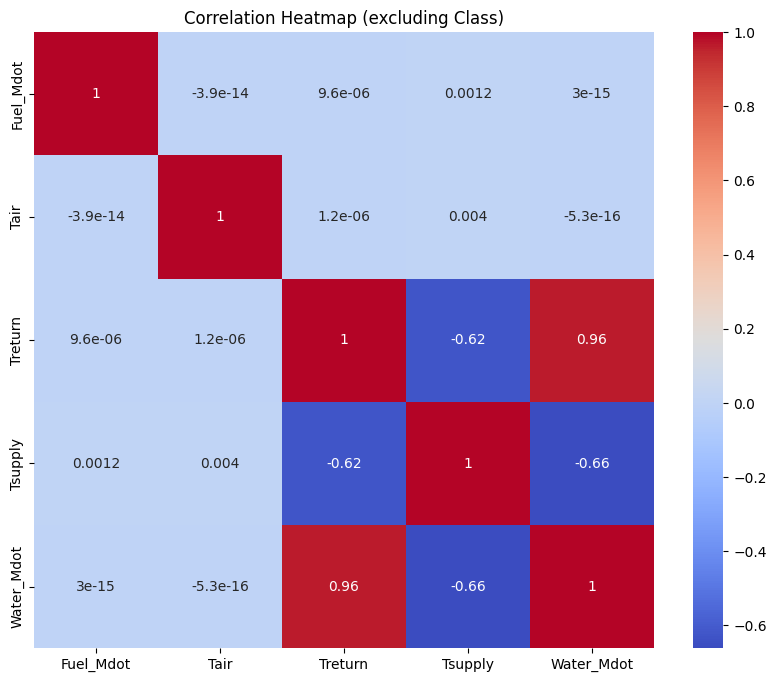

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.drop(columns=['Class']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (excluding Class)")
plt.show()

###Ques.4 Find correlation between the various features and the target class

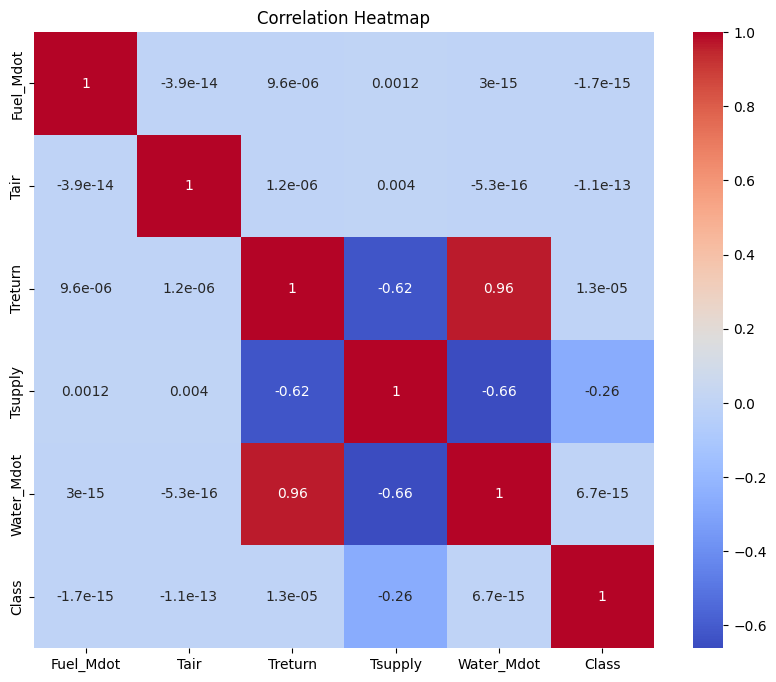

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Tsupply is the only feature with a noticeable correlation to Class (−0.26), though it's still weak.

All other features are either uncorrelated or have an extremely small correlation with the target class.

Features like Fuel_Mdot, Tair, and Water_Mdot provide no predictive signal for Class.

###Ques 5. Show graphically the distribution of key continuous features across all classes — Lean, Nominal, ExcessAir, Fouling, and Scaling — to visually assess the degree of overlap or separation between classes.

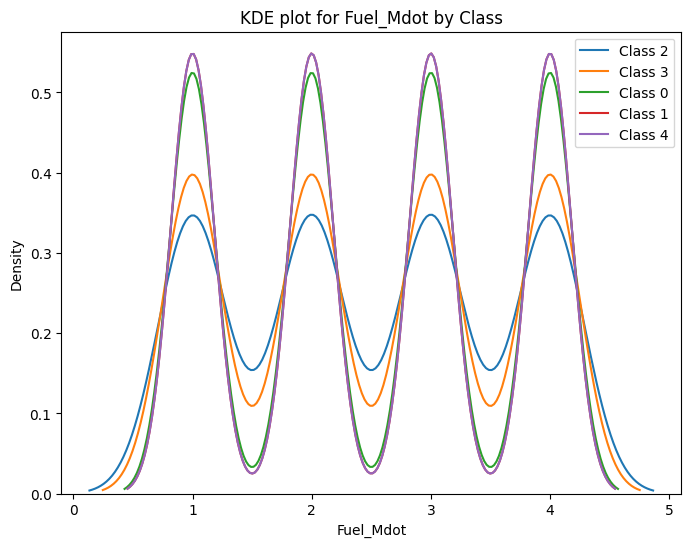

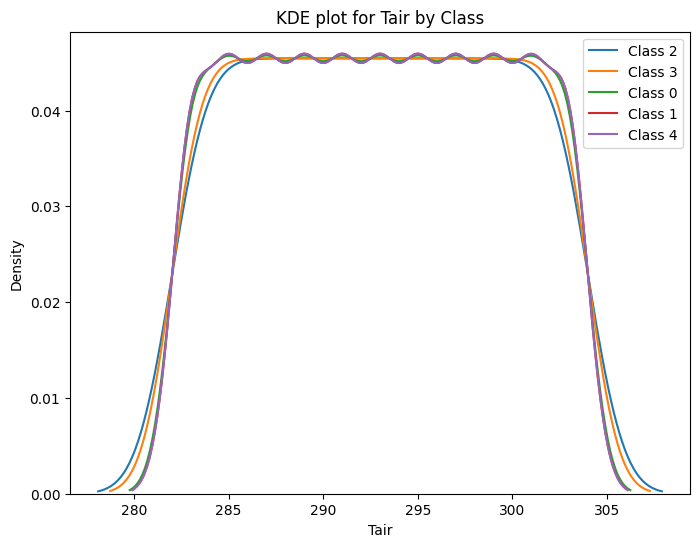

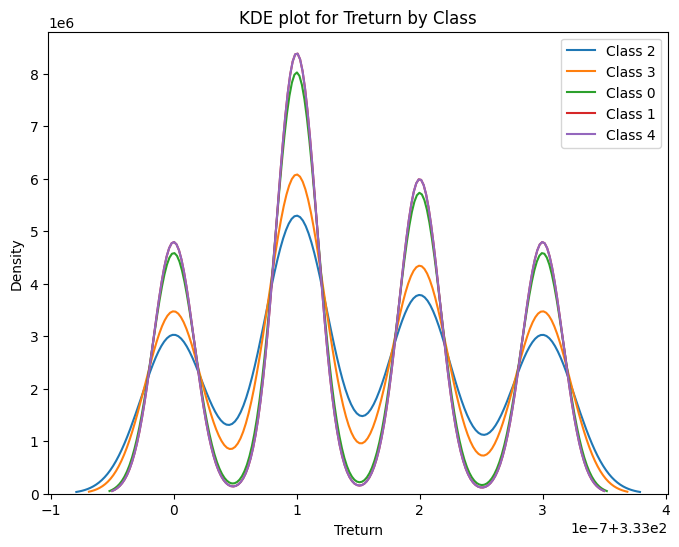

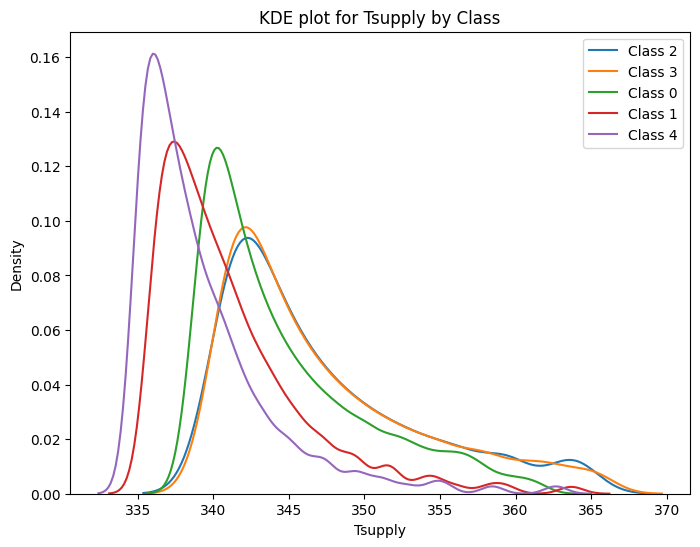

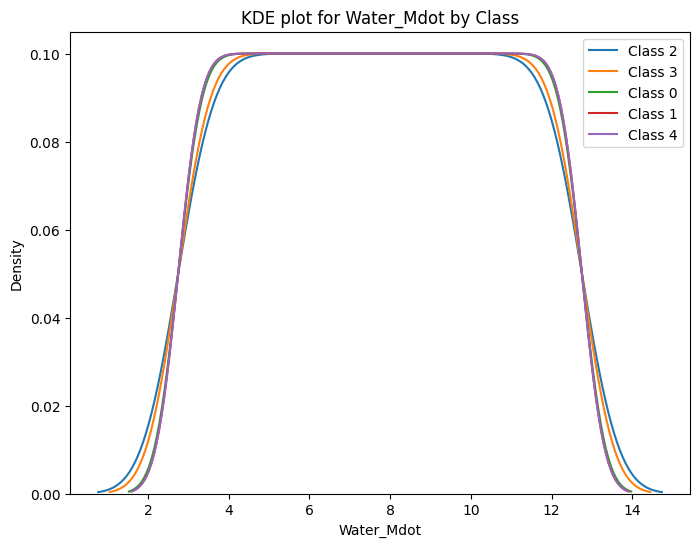

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
classes = y.unique()

for col in X.columns:
  plt.figure(figsize=(8, 6))
  for cls in classes:
    sns.kdeplot(X[col][y == cls], label=f'Class {cls}')
  plt.title(f'KDE plot for {col} by Class')
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.legend()
  plt.show()

### KDE Plot Observations by Feature

**1. Fuel\_Mdot**

* All classes exhibit strongly overlapping multi-modal distributions.
* Peaks occur at the same locations with minimal vertical separation.
  **➤ Conclusion:** Classes are not well-separated based on *Fuel\_Mdot*.


**2. Tair**

* KDE lines are nearly identical across all classes, forming a flat-top shape.
* There is virtually no variation in the distributions among classes.
  **➤ Conclusion:** *Tair* provides no visual class distinction.


**3. Treturn**

* KDE curves for different classes show similar multi-peak shapes.
* Amplitude differences are noticeable, with Class 4 showing higher peaks.
  **➤ Conclusion:** Some potential for moderate class separation, especially when combined with other features.

**4. Tsupply**

* KDE plots are clearly separated by class, particularly at lower values.
* Classes 4 and 1 peak lower than others, with significant divergence in shape and peak location.
  **➤ Conclusion:** *Tsupply* demonstrates strong class separability and is the most visually informative feature.

**5. Water\_Mdot**

* KDE curves form an almost uniform plateau across classes.
* Minimal differences; curves largely overlap.
  **➤ Conclusion:** *Water\_Mdot* provides little to no class distinction.

#Model

To establish a baseline, we will train an initial classification model and evaluate its performance using 5-fold cross-validation and a held-out test set.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

rf_model.fit(X_train, y_train)

test_accuracy = rf_model.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)
print("\nClassification Report on Test Set:\n")

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.79747995 0.80847652 0.80343643 0.79381443 0.7832264 ]
Mean cross-validation accuracy: 0.7972867457685132
Test set accuracy: 0.8007697947214076

Classification Report on Test Set:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1431
           1       0.73      0.77      0.75      1754
           2       0.15      0.17      0.16       174
           3       0.74      0.77      0.75       345
           4       0.88      0.73      0.80      1752

    accuracy                           0.80      5456
   macro avg       0.68      0.69      0.68      5456
weighted avg       0.81      0.80      0.80      5456



The model performs well on majority classes (e.g., class 0 and 4) but struggles significantly on minority class 2, with an F1-score of just 0.16.
The overall macro average F1-score is 0.68, indicating imbalance in class-wise performance.
The weighted average metrics are dominated by high-performing majority classes.

###To improve upon the baseline model’s performance, we will apply :
Custom Feature Engineering: to inject domain knowledge into the model.

Standardization: via StandardScaler to normalize numerical features.

Class Balancing using SMOTE (Synthetic Minority Over-sampling Technique): to improve representation of minority classes in the training set.

RFECV: performs feature selection in a recursive manner across multiple cross-validation folds. In each iteration, it removes the least important feature(s), performs k-fold cross-validation using the remaining features, and evaluates model performance. This process is repeated until only one feature remains. The feature subset with the highest mean cross-validation accuracy is selected as optimal.

To ensure the validity of model evaluation and prevent data leakage, all preprocessing steps were encapsulated within a single pipeline. This structure guarantees that each transformation is applied only on the training portion of each cross-validation fold, never on the full dataset.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["Class"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

def custom_features(df):
    df = df.copy()
    df['delta_temp'] = df['Treturn'] - df['Tsupply']
    df['Air_Supply_interaction'] = df['Tair'] * df['Tsupply']
    df['Treturn_to_Tsupply'] = df['Treturn'] / (df['Tsupply'] + 1e-5)
    return df

feature_engineering = FunctionTransformer(custom_features)

rf = RandomForestClassifier(random_state=42)

pipe = ImbPipeline(steps=[
    ("feature_engineering", feature_engineering),
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("feature_selection", RFECV(estimator=rf, step=1, cv=5, scoring='accuracy', n_jobs=-1)),
    ("classifier", rf)
])

cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Cross-Validation Accuracy Scores: [0.9486827  0.95097365 0.95143184 0.93997709 0.94821265]
Mean CV Accuracy: 0.9478555882084281
Standard Deviation: 0.004132657250779659

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1408
           1       0.97      0.91      0.94      1760
           2       0.51      0.76      0.61       176
           3       0.86      0.99      0.92       352
           4       1.00      0.97      0.98      1760

    accuracy                           0.95      5456
   macro avg       0.86      0.92      0.89      5456
weighted avg       0.96      0.95      0.95      5456



**Key Improvements:-**

Substantial gain from **~79.7% to 94.7%** of mean CV accuracy.
Macro average F1-score increased from 0.68 → 0.89, indicating balanced class-wise performance.
Minority class (Class 2) recall improved from 0.17 → 0.76, highlighting effective handling of class imbalance.

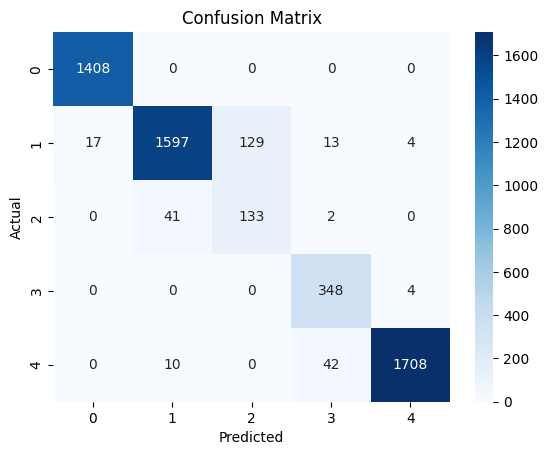

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()